<a href="https://colab.research.google.com/github/swathishaji/Internship1/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/breast-cancer.data.txt")
display(df.head())

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
df.dtypes

,0
no-recurrence-events,object
30-39,object
premeno,object
30-34,object
0-2,object
no,object
3,int64
left,object
left_low,object
no.1,object


In [ ]:
df.shape

(285, 10)

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events
30-39,40-49,40-49,60-69,40-49,60-69,50-59,60-69,40-49,40-49,40-49
premeno,premeno,premeno,ge40,premeno,ge40,premeno,ge40,premeno,premeno,premeno
30-34,20-24,20-24,15-19,0-4,15-19,25-29,20-24,50-54,20-24,0-4
0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2
no,no,no,no,no,no,no,no,no,no,no
3,2,2,2,2,2,2,1,2,2,3
left,right,left,right,right,left,left,left,left,right,left
left_low,right_up,left_low,left_up,right_low,left_low,left_low,left_low,left_low,left_up,central
no.1,no,no,no,no,no,no,no,no,no,no


In [ ]:
df.columns = ['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast_quad','irradiant']
display(df.head())

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast_quad,irradiant
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
for col in df.select_dtypes(include='object').columns:
  unique_vals=df[col].unique()
  print(f"Column '{col}' ({len(unique_vals)} unique values:")
  print(unique_vals)
  print("_" * 50)

Column 'no-recurrence-events' (2 unique values:
['no-recurrence-events' 'recurrence-events']
__________________________________________________
Column '30-39' (6 unique values:
['40-49' '60-69' '50-59' '30-39' '70-79' '20-29']
__________________________________________________
Column 'premeno' (3 unique values:
['premeno' 'ge40' 'lt40']
__________________________________________________
Column '30-34' (11 unique values:
['20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '30-34' '40-44' '35-39'
 '5-9' '45-49']
__________________________________________________
Column '0-2' (7 unique values:
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
__________________________________________________
Column 'no' (3 unique values:
['no' 'yes' '?']
__________________________________________________
Column 'left' (2 unique values:
['right' 'left']
__________________________________________________
Column 'left_low' (6 unique values:
['right_up' 'left_low' 'left_up' 'right_low' 'central' '?']
___________

In [ ]:
for col in df.columns:
    # Count of '?' entries
    q_count = df[col][df[col] == '?'].count()
    # Count of actual NaN entries
    nan_count = df[col].isna().sum()
    total_missing = q_count + nan_count
    if total_missing:
        print(f"Column '{col}': '?' = {q_count}, NaN = {nan_count}, Total missing = {total_missing}")

Column 'no': '?' = 8, NaN = 0, Total missing = 8
Column 'left_low': '?' = 1, NaN = 0, Total missing = 1


In [ ]:
df.replace('?', np.nan, inplace=True)
display(df.head())

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast_quad,irradiant
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
missing_values_count = df.isnull().sum()
print("Missing values count after replacing '?':")
print(missing_values_count)

Missing values count after replacing '?':
Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast_quad    1
irradiant      0
dtype: int64


In [ ]:
missing_values_count = df.isnull().sum()
missing_proportions = missing_values_count / len(df)
print("Proportion of missing values:")
print(missing_proportions[missing_proportions > 0])

# Based on the proportions, drop rows with missing values
df.dropna(inplace=True)
display(df.head())

Proportion of missing values:
node-caps      0.028070
breast_quad    0.003509
dtype: float64


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast_quad,irradiant
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

Class 0
age 0
menopause 0
tumor-size 0
inv-nodes 0
node-caps 0
breast 0
breast_quad 0
irradiant 0


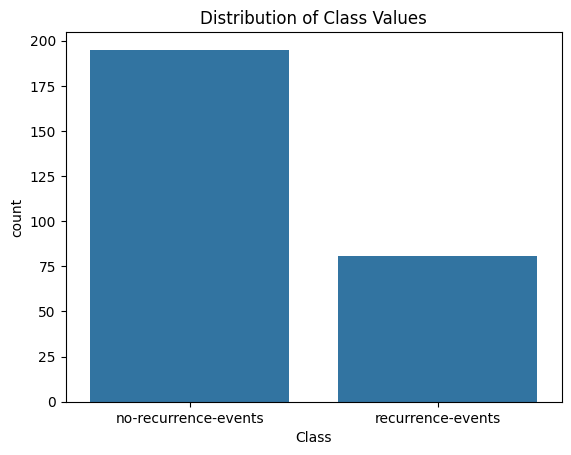

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Class", data=df)
plt.title("Distribution of Class Values")
plt.show()

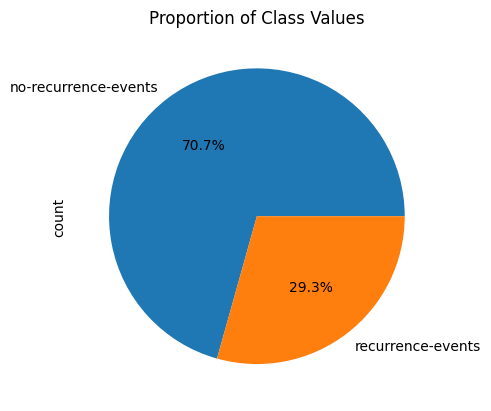

In [ ]:
df['Class'].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Proportion of Class Values")
plt.show()

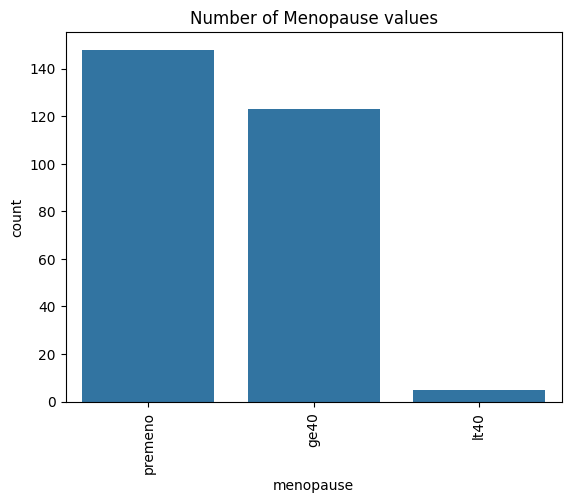

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="menopause", data=df)
plt.xticks(rotation=90)
plt.title("Number of Menopause values")
plt.show()

In [ ]:
print("Proportion of Menopause")
print(df['menopause'].value_counts(normalize=True)*100)

Proportion of Menopause
menopause
premeno    53.623188
ge40       44.565217
lt40        1.811594
Name: proportion, dtype: float64


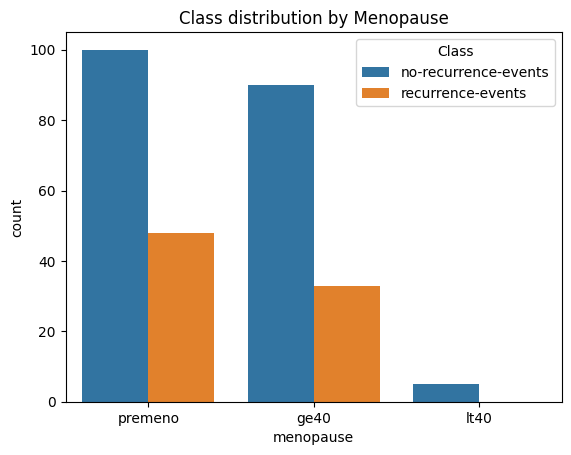

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="menopause", hue="Class", data=df)
plt.title("Class distribution by Menopause")
plt.show()

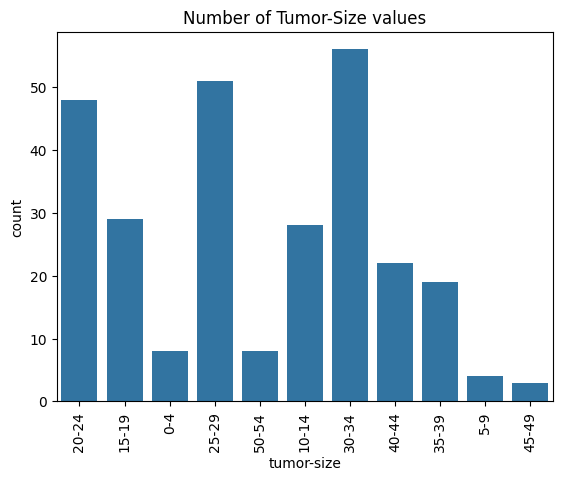

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="tumor-size", data=df)
plt.xticks(rotation=90)
plt.title("Number of Tumor-Size values")
plt.show()

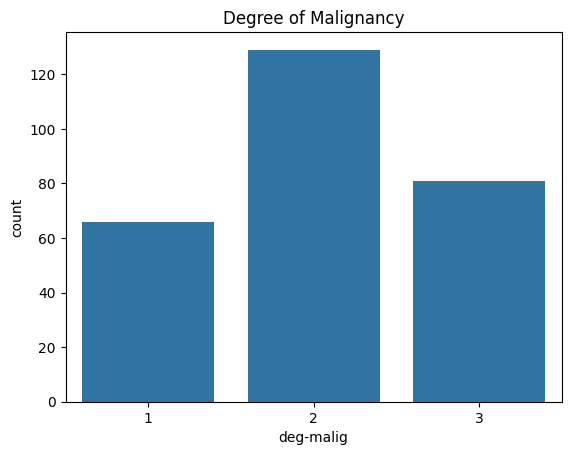

Proportion of Deg_malig
deg-malig
2    46.739130
3    29.347826
1    23.913043
Name: proportion, dtype: float64


In [36]:
sns.countplot(x = "deg-malig", data = df)
plt.title("Degree of Malignancy")
plt.show()
print("Proportion of Deg_malig")
print(df['deg-malig'].value_counts(normalize = True)*100)

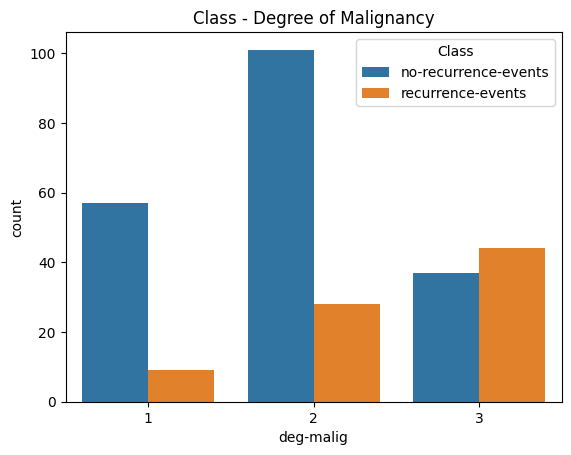

In [38]:
sns.countplot(x="deg-malig", hue= "Class", data = df)
plt.title("Class - Degree of Malignancy")
plt.show()

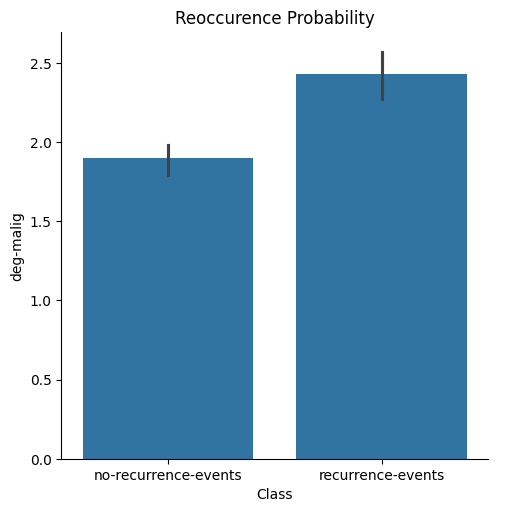

In [40]:
sns.catplot(x = "Class", y = "deg-malig",
            data = df, kind = "bar", height= 5)
plt.title("Reoccurence Probability")
plt.show()

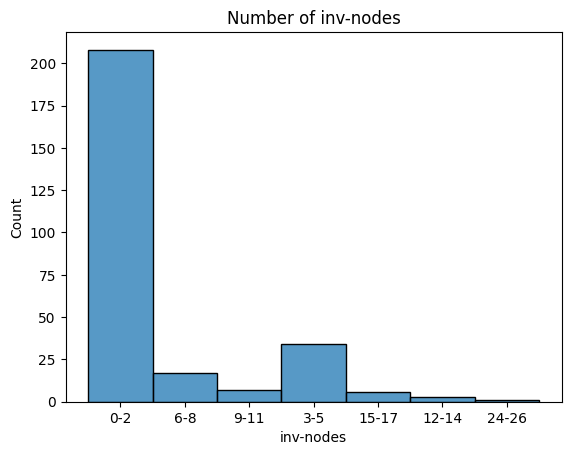

Proportion of inv-nodes
inv-nodes
0-2      75.362319
3-5      12.318841
6-8       6.159420
9-11      2.536232
15-17     2.173913
12-14     1.086957
24-26     0.362319
Name: proportion, dtype: float64


In [42]:
sns.histplot(x = "inv-nodes", data = df)
plt.title("Number of inv-nodes")
plt.show()
print("Proportion of inv-nodes")
print(df['inv-nodes'].value_counts(normalize = True)*100)

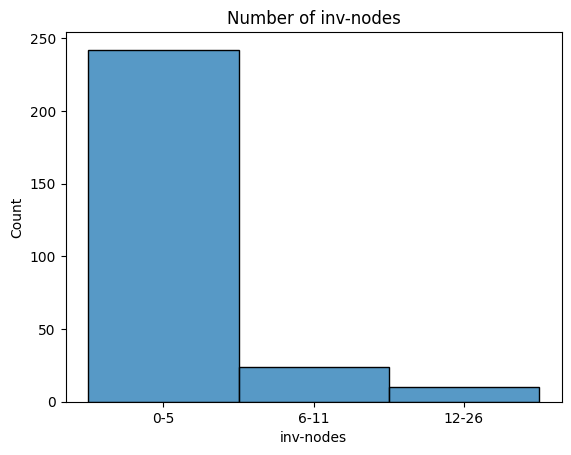

In [45]:
df['inv-nodes'] = df['inv-nodes'].replace({"0-2": "0-5", "3-5": "0-5"})
df['inv-nodes'] = df['inv-nodes'].replace({"6-8": "6-11", "9-11": "6-11"})
df['inv-nodes'] = df['inv-nodes'].replace({"15-17": "12-26", "12-14": "12-26","24-26":"12-26"})

sns.histplot(x = "inv-nodes", data = df)
plt.title("Number of inv-nodes")
plt.show()

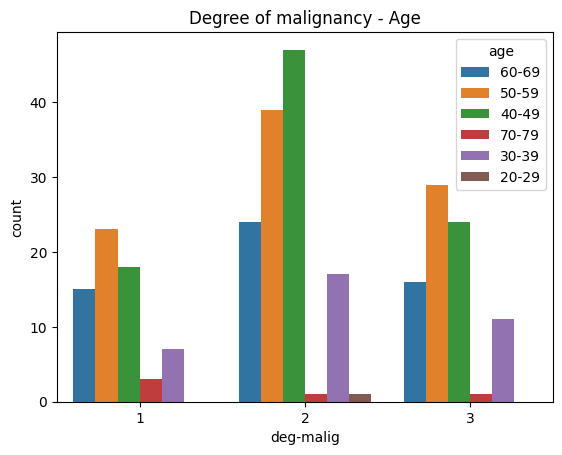

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="deg-malig", hue= "age", data = df)
plt.title("Degree of malignancy - Age")
plt.show()

In [54]:
import pandas as pd

# Target variable encoding
df['Class_encoded'] = df['Class'].map({'no-recurrence-events': 0, 'recurrence-events': 1})

# Binary features encoding
df['node_caps_encoded'] = df['node-caps'].map({'no': 0, 'yes': 1})
df['irradiant_encoded'] = df['irradiant'].map({'no': 0, 'yes': 1})
df['breast_encoded'] = df['breast'].map({'left': 0, 'right': 1})

# Ordinal features encoding using enumeration
age_map = {val: i for i, val in enumerate(sorted(df['age'].unique()))}
tumor_size_map = {val: i for i, val in enumerate(sorted(df['tumor-size'].unique()))}
inv_nodes_map = {val: i for i, val in enumerate(sorted(df['inv-nodes'].unique()))}

df['age_encoded'] = df['age'].map(age_map)
df['tumor_size_encoded'] = df['tumor-size'].map(tumor_size_map)
df['inv_nodes_encoded'] = df['inv-nodes'].map(inv_nodes_map)

# Ensure deg_malig is treated as a number (it's already int64, but good practice)
df['deg_malig_encoded'] = pd.to_numeric(df['deg-malig'])

# One-hot encode nominal features
df_processed = pd.get_dummies(df, columns=['menopause', 'breast_quad'], drop_first=True, dtype=int)

# Display the processed dataframe (showing encoded columns)
display(df_processed.head())

,Class,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiant,Class_encoded,node_caps_encoded,...,age_encoded,tumor_size_encoded,inv_nodes_encoded,deg_malig_encoded,menopause_lt40,menopause_premeno,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up
0,no-recurrence-events,40-49,20-24,0-5,no,2,right,no,0,0,...,2,3,0,2,0,1,0,0,0,1
1,no-recurrence-events,40-49,20-24,0-5,no,2,left,no,0,0,...,2,3,0,2,0,1,1,0,0,0
2,no-recurrence-events,60-69,15-19,0-5,no,2,right,no,0,0,...,4,2,0,2,0,0,0,1,0,0
3,no-recurrence-events,40-49,0-4,0-5,no,2,right,no,0,0,...,2,0,0,2,0,1,0,0,1,0
4,no-recurrence-events,60-69,15-19,0-5,no,2,left,no,0,0,...,4,2,0,2,0,0,1,0,0,0


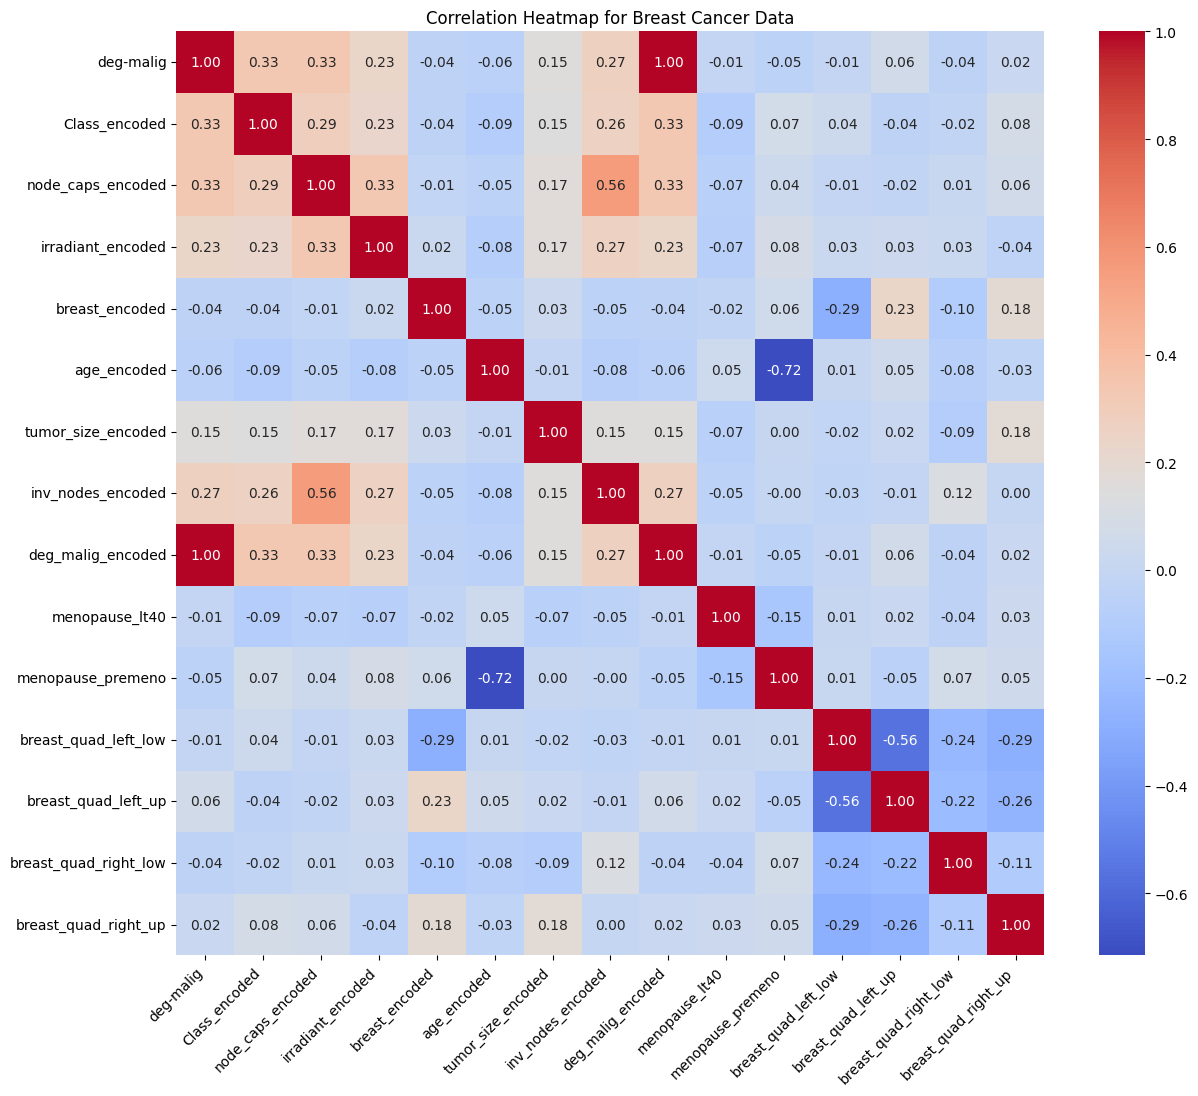

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop original categorical columns before computing correlation
categorical_cols = ['Class', 'age', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'irradiant']
df_processed_numeric = df_processed.drop(columns=categorical_cols)


# Compute correlation matrix
corr_matrix = df_processed_numeric.corr()

# Plot heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for Breast Cancer Data')
plt.xticks(rotation=45,ha ='right')
plt.yticks(rotation=0)
plt.show()

In [59]:
import pickle
with open('breast_cancer_processed.pkl', 'wb') as f:
    pickle.dump(df_processed, f)
print("DataFrame saved with pickle.")

DataFrame saved with pickle.
